# Assignment 8
## name : rocky kim 
## student id : 20152424
## github link :[https://github.com/Epicevent/assignment08](https://github.com/Epicevent/assignment07 ) 

# get training data via given code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1
print (np.shape(list_image_train[:,0]))
print (np.shape(list_label_train))
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1



(784,)
(60000,)


# model for binary classfier



 feature funtion for a image


 def>  $\mathbb{M}$ : set of  M images
 
 
 $$ 
 \mathbb{M} = \{m_1 , m_2 , \cdots , m_M \}
 $$ 




#  Domain and codomain of feature function 


let number of feature is 784


$$ 
f :  \mathbb{M} \to \mathbb{R}^{784}   
$$




# definition of feature function for training


let $$ x \in M $$ be a vector that represent an image of the size 28 × 28 


$$   
x = (x_1 ,x_2 , \cdots , x_{784})   
$$


$$ 
f(x) = (f_1(x), \cdots , f_{784}(x) ) 
$$


$$ 
f_i : \mathbb{R}^{784} \to \mathbb{R} 
$$


$$
f_i(x) = x_i 
$$

In [2]:
def feature(i, image):
    '''
       i : feature index 1~ 784
       image : np.array shape : ( 784 , )
       return i th feature
    '''
    return image[i - 1]

# Model parameter and model for getting partitioning function

# definition of colunm vector 




$$
     a_j=
  \left[ {\begin{array}{ccccc}
   f_j(m_1) \\
   f_jm_2) \\
   \vdots \\
   f_j(m_M) 
  \end{array}}  \right]
$$




# definition of image feature Matrix A


$$
   A=
  \left[ {\begin{array}{ccccc}
   a_1 & a_2 & \dots & a_{784} 
  \end{array} } \right]
$$
  
 


# definition of label vector b for least square


$$
 y_i={\begin{cases}
    1, & \text{if } m_i \text{ is image of digit '0' }.\\
   -1, & \text{otherwise}.
\end{cases}}
$$


$$
b=  \left[ {\begin{array}{ccccc}
y_1 \\
 y_2 \\
   \vdots \\
   y_N 
  \end{array} } \right]
$$

In [3]:
def makeA( imagelist ): 
    '''
        imagelist : np.array with shape (784, 60000)
        return . transeposed array with shape (60000, 784 = num of feature)
    '''
    num_feature = np.shape(imagelist)[0]
    Arows = np.shape(imagelist)[1]  # since A's shape is ( shape(imagelist.T) )
    Acols = num_feature
    A = np.empty((Arows , Acols), dtype=float)
    for i in range( Arows ):
        for j in range(Acols):
                A[i,j] = feature(j + 1,imagelist[:,i]) 
    return A


def makeb (labellist):
    '''
        labellist : np.array with shape (60000,)
        return :column vector with shape (1,60000) and value in {1, -1}
    '''
    numdata = np.shape(labellist)[0]
    b = labellist.reshape((numdata, 1))
    condlist = [b==0, b!=0]
    choicelist = [1, -1]
    return np.select(condlist, choicelist)


# model parameter 

${\theta} \in {\mathbb{R}^{N}}$ denotes model parameter


$N (= 784)$ is number of feature 

$$
\theta =  \left[ {\begin{array}{ccccc}
  \theta_1 \\
  \theta_2 \\  
  \vdots \\
  \theta_N
  \end{array} } \right] 
$$



# the least square problem 
   
   find $\theta$ that minimize 

$$ 
\| A\theta - b   \|^2 = \sum_{j=1}^{n}{r_j^2} \quad where, \quad r_j = y_j -\tilde{f}(x_j)
$$


# QR decomposition of A
More generally, we can factor a complex $m \times n$ matrix $A$, with $m≥n$, as the product of an $m\times m$ unitary matrix $Q$ and an $m\times n$ upper triangular matrix $R$.  As the bottom ($m − n$) rows of an $m\times n$ upper triangular matrix consist entirely of zeroes, it is often useful to partition $R$, or both $R$ and $Q$:
$$
  A = QR = Q \begin{bmatrix} R_1 \\ 0 \end{bmatrix}
    = \begin{bmatrix} Q_1, Q_2 \end{bmatrix} \begin{bmatrix} R_1 \\ 0 \end{bmatrix}
    = Q_1 R_1,
$$




# the solution $\theta$ Satisfies below equations


$$(A^T A)
   \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2 \\
   \vdots \\
   \theta_N
  \end{array} } \right]=A^Tb  
$$


$$
\iff 
(R_1^T R_1) \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2 \\
   \vdots \\
   \theta_N
  \end{array} } \right] = A^Tb = R_1^{T}Q_1^Tb
$$


# let $\text{R}= R_1$ , compute $\text{R}^T \text{R}$


let $r_i$ is row vector($\in \mathbb{R}^{784}$) of matrix $\text{R}$ 


$$\text{R} = \left[ {\begin{array}{ccccc}
   r_1 \\
   r_2 \\
   \vdots \\
   r_N
  \end{array} } \right]
$$
 
 
$$\text{R}^T \text{R} = 
   r_1^T r_1 + r_2^T r_2 + \cdots + r_N^T r_N 
$$


$$
\text{R}^T \text{R} \theta  = r_1^T r_1 \theta + r_2^T r_2 \theta + \cdots + r_N^T r_N  \theta
$$


$$
\text{R}^T  q  = r_1^T  q + r_2^T  q + \cdots + r_N^T q
$$


# the least square solution theta statisfy


$$
\sum_{i=1}^{N}\sum_{k\geq i}{(R_{i,k})r_k\theta} =\sum_{i=1}^{N} \sum_{k\geq i}{R_{i,k}q_{k}} 
$$


# solve the problem

suppose we have 

$$\theta_{l+1},\cdots,\theta_N$$ 

that satisfies


$$\forall i \geq l+1$$


$$
\sum_{k\geq i}{(R_{i,k})r_k\theta} = \sum_{k\geq i}{R_{i,k}q_{k}} 
$$


then We define $\Theta_l$ as

if $\text{R}_{l,l}\neq 0$
    
    
$$
\Theta_l = (q_{l} - \sum_{ l \lt i \leq N }R_{l,i}\theta_N)/R_{l,l}
$$


else (in this case $\text{R}_{l,l} = 0$ )


$$
\Theta_l = 0 
$$


then we can pick  
$$ \theta_l = \Theta_l$$ 


finally we get


$$\theta_l,\cdots,\theta_N$$


that satisfies 


$$\forall i \geq l$$


$$
\sum_{k\geq i}{(R_{i,k})r_k\theta} = \sum_{k\geq i}{R_{i,k}q_{k}} 
$$

# Back substitution to solve the problem


let 


$$\text{R}_{ij} = R_1(i,j)$$   


let


$$Q_1^Tb = q =\left[ {\begin{array}{ccccc}
   q_1 \\
   q_2 \\
   \vdots \\
   q_N
  \end{array} } \right]$$ 
 
 
write

$$
( R_1) \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2 \\
   \vdots \\
   \theta_N
  \end{array} } \right] = \left[ {\begin{array}{ccccc}
   q_1 \\
   q_2 \\
   \vdots \\
   q_N
  \end{array} } \right] 
$$ as


$$
\begin{aligned}
   \text{R}_{11} \theta_{1} +\text{R}_{12} \theta_{2}+ \cdots + 
   \text{R}_{1,N-1}\theta_{N-1} + \text{R}_{1N}\theta_{N}  &= q_1 \\
   \vdots \\
   \text{R}_{N-1,N-1} \theta_{N-1} + \text{R}_{N-1,N}\theta_{N}&= q_{N-1}\\
   \text{R}_{N,N}\theta_{N}&= q_{N}
\end{aligned}
$$



# get sudo solution of Back substitution


Of course, this equation may not have solution


( if some digonal element is zero )


but the equation implies the equation of least square plobrem .


from last equation we get 


$$  
  \theta_N=\begin{cases}
    q_{N}/R_{NN} & \text{if $R_{NN} \neq 0$ }.\\
    0 & \text{if $R_{NN}=0$ }.
  \end{cases}
$$


I from 2nd to last equation we get


$$
  \theta_{N-1}=\begin{cases}
    (q_{N-1} - R_{N-1,N}\theta_N)/R_{N-1,N-1} & \text{if $R_{N-1,N-1} \neq 0$ }.\\
    0 & \text{if $R_{N-1,N-1}=0$ }.
  \end{cases}
$$



I continue to get $\theta_{N-2},\theta_{N-3},\cdots,\theta_{1}$ 


# then this $\theta$ satisfy the least square problem


-

In [40]:
def solve_model_parameter(A,b):
    if  np.shape(b)[0] !=1:
        numdata = np.shape(b)[0]
        b = b.reshape((numdata, 1))
    numfeature = np.shape(A)[1]
    Q ,R = np.linalg.qr(A)
    q =np.matmul(Q.T, b)
    theta_vector = np.zeros((numfeature,1),dtype=float)
    for i in range(numfeature):
        n = numfeature - i # 1<=n <= numfeature (decreasing)
        if R[n-1,n-1] == 0 : # R_(n,n)
            theta_vector[n-1,0] = 0 # theta_vector_(n,1)
        else:
            rthetasum =0 
            for j in range (numfeature-n):
                l = numfeature- j # 1<= l <=N ( decreasing )
                rthetasum += R[n -1 ,l-1]*theta_vector[l-1,0]
            theta_vector[n-1,0] = (q[n-1,0] - rthetasum)/R[n-1,n-1]
    return theta_vector



# plot the parameter $\theta_1,\theta_2,\cdots,\theta_{784}$ in the image form 28X28


In [41]:
def plot_theta_vector(theta_vector):
    data_normalized = (theta_vector - min(theta_vector)) / (max(theta_vector) - min(theta_vector))
     # nomalize
    im_matrix   = data_normalized.reshape((28, 28))
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    plt.show()

training ... 
A and b are made 


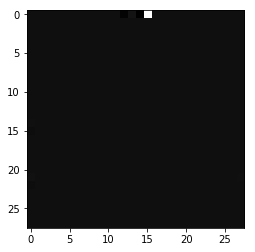

In [42]:
A_train = makeA (list_image_train)
b_train = makeb (list_label_train)
model_parameter =solve_model_parameter(A_train,b_train)
plot_theta_vector(model_parameter) # plot modelparemeter 

# The partitioning function

$$\tilde{f} : \mathbb{R}^{ 784}\to \mathbb{R}$$ 

is defined by 
inner product of feature and model parameter


$$
   \tilde{f}(x; \theta) =  \langle \theta,f(x)\rangle 
$$


$$
   \tilde{f}(x; \theta) = \theta_1f_1(x) +\theta_2f_2(x) + \cdots +\theta_{784}f_{784}(x)
$$

$$
    A \theta = 
   \left[ {\begin{array}{ccccc}
  \tilde{f}(x_1) \\
   \tilde{f}(x_2) \\  
  \vdots \\
    \tilde{f}(x_N)
  \end{array} } \right]
$$

In [43]:
A_test = makeA (list_image_test)
b_test = makeb (list_label_test)
partitioning_vec = np.matmul(A_test,model_parmeter) # test input partition 

# binary classifier f(x) 

$$f(x) = sign( \tilde{f}(x))$$ 


using the sign function:


$$
  sign(x)=\begin{cases}
    +1 & \text{ if  $ (x)>0 $ }.\\
    -1 & \text{if  $ (x)<0 $ }.
  \end{cases}
$$

In [66]:
classifier_vec = np.sign(partitioning_vec) # sign : if x < 0 return 1 else return 1

# TP TN FP FN

In [72]:
true = (classifier_vec == b_test) # true
false = ~true #false 
def positive(true_or_false,classifier_vec):
    return (true_or_false[:,0] & (classifier_vec == 1.0)[:,0])


def negative(true_or_false,classifier_vec):
    return (true_or_false[:,0] & (classifier_vec == -1.0)[:,0])
Total = np.size(TP)
TP = positive(true,classifier_vec)
TN = negative(true,classifier_vec)
FP = positive(false,classifier_vec)
FN = negative(false,classifier_vec)
print("Total: {:d} \nTP: {:d} ,TN: {:d}, FP: {:d} ,FN: {:d}".format(Total,
    np.sum(TP),np.sum(TN),np.sum(FP),np.sum(FN)))

Total: 10000 
TP: 925 ,TN: 358, FP: 8662 ,FN: 55


# Plot the average image (28 X 28)

In [99]:

def draw_average(condition,title):
    f2 = plt.figure()
    im_average  = np.zeros((size_row * size_col), dtype=float)
    im_count    = 0
    for i in range(num_test):
        if condition[i] : # TP TN FP FN
            im_average += list_image_test[:, i]
            im_count += 1 # 

    im_average /= im_count
    plt.title(title)
    plt.imshow(im_average.reshape((size_row, size_col)), 
               cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()

# plot average TP

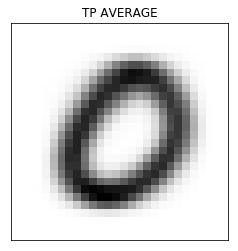

In [100]:
draw_average(TP,"TP AVERAGE") # true positive

# plot average TN

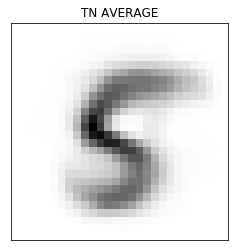

In [101]:
draw_average(TN,"TN AVERAGE") # true negative

# plot average FP

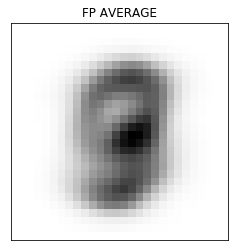

In [102]:
draw_average(FP,"FP AVERAGE") # false positive

# plot average FN

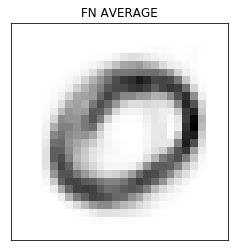

In [103]:
draw_average(FN,"FN AVERAGE") #false negative